## **Problem Statement**

The dataset in question contains a comprehensive collection of electronic
health records belonging to patients who have been diagnosed with a specific disease. These health records comprise a detailed log of every aspect of the patients' medical history, including all diagnoses, symptoms, prescribed drug treatments, and medical tests that they have undergone. Each row represents a healthcare record/medical event for a patient and it includes a timestamp for each entry/event, thereby allowing for a chronological view of the patient's medical history.

The Data has mainly three columns
1) **Patient-Uid** - Unique Alphanumeric Identifier for a patient
2) **Date** - Date when patient encountered the event.
3) **Incident** - This columns describes which event occurred on the day.

#Problem
The development of drugs is critical in providing therapeutic options
for patients suffering from chronic and terminal illnesses. “Target Drug”, in particular, is designed to enhance the patient's health and well-being without causing dependence on other medications that could potentially lead to severe and life-threatening side effects. These drugs are specifically tailored to treat a particular disease or condition, offering a more focused and effective approach to treatment, while minimising the risk of harmful reactions.

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score as ras, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('train.parquet')
df.sample(10)

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.isnull().sum() #checking null values and we don't have null values

In [ ]:
df.duplicated().sum() #checking Duplicate values

In [ ]:
df.shape #before droping duplicates

In [ ]:
df = df.drop_duplicates() 

In [ ]:
df.shape #after droping duplicates

In [ ]:
df.duplicated().sum()

In [ ]:
df.dtypes

In [ ]:
df['Incident'].unique() #finding unique values

In [ ]:
df['Incident'].value_counts()

In [ ]:
df['Patient-Uid'].value_counts()

In [ ]:
df['Date'].value_counts()

In [ ]:
#retriving Positive Datas
df_positive_data = df[df['Incident'] == 'TARGET DRUG']
df_positive_data

In [ ]:
#retriving negative Datas
negative_data = df[~df['Patient-Uid'].isin(df_positive_data['Patient-Uid'])]
df_negative_data = negative_data.groupby('Patient-Uid').tail(1)


In [ ]:
# to get the count of previous prescriptions within specific time intervals
df_positive_data['Count Of Prescription'] = df_positive_data.groupby('Patient-Uid')['Date'].cumcount()
df_negative_data['Count Of Prescription'] = df_negative_data.groupby('Patient-Uid')['Date'].cumcount()


In [ ]:
# to get the difference between the most recent prescription and the prediction date.
prediction_date = pd.to_datetime('today')+pd.DateOffset(days=30)
df_positive_data['Time_Difference'] = (prediction_date - df_positive_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days
df_negative_data['Time_Difference'] = (prediction_date - df_negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days


In [ ]:
df_1 = pd.concat([df_positive_data,df_negative_data])
df_1.head

In [ ]:
#train test splitting
X_train,X_test,y_train,y_test = train_test_split(df_1[['Count Of Prescription','Time_Difference']],df_1['Incident'] == 'TARGET DRUG',test_size= 0.2,random_state=42)

In [ ]:
#with three models
models = [LogisticRegression(),XGBClassifier(random_state = 42),AdaBoostClassifier()]

LogisticRegression
              precision    recall  f1-score   support

       False       0.86      0.83      0.84      3520
        True       0.96      0.96      0.96     13456

    accuracy                           0.94     16976
   macro avg       0.91      0.90      0.90     16976
weighted avg       0.94      0.94      0.94     16976

F1_Score 0.9364985862393967


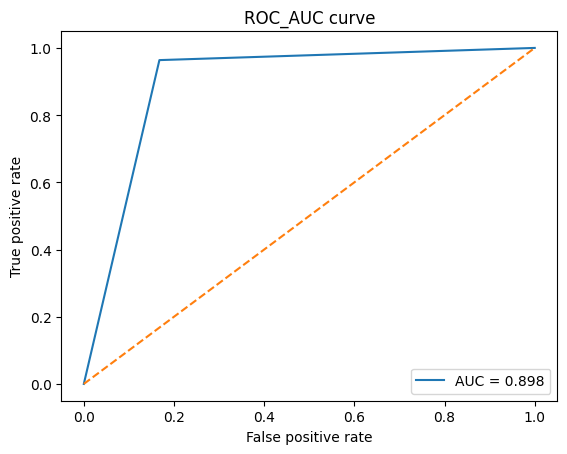

XGBClassifier
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      3520
        True       0.98      0.95      0.96     13456

    accuracy                           0.94     16976
   macro avg       0.90      0.93      0.91     16976
weighted avg       0.94      0.94      0.94     16976

F1_Score 0.939385014137606


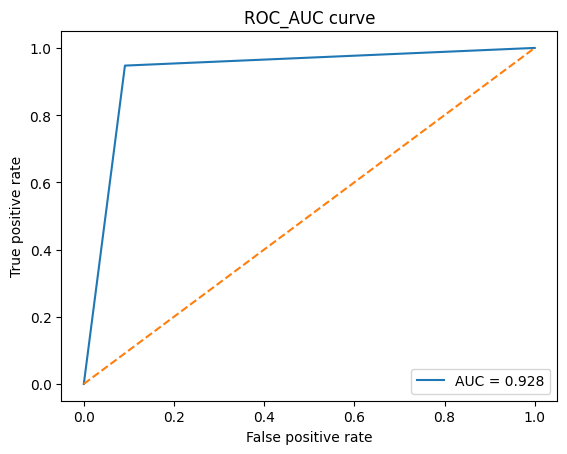

AdaBoostClassifier
              precision    recall  f1-score   support

       False       0.81      0.93      0.86      3520
        True       0.98      0.94      0.96     13456

    accuracy                           0.94     16976
   macro avg       0.90      0.94      0.91     16976
weighted avg       0.94      0.94      0.94     16976

F1_Score 0.9397384542884072


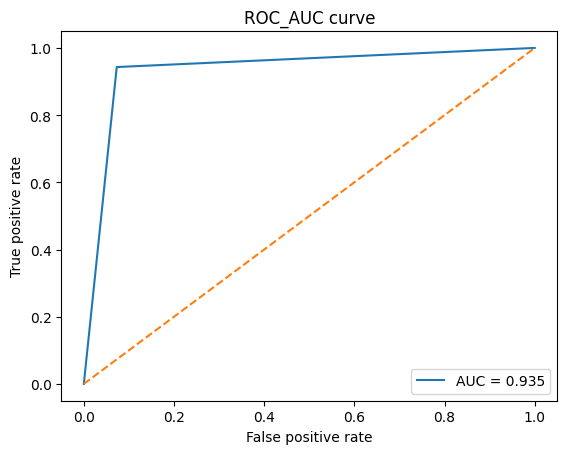

In [132]:
#Fitting and predicting the model
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test,y_pred))
    F1_score = f1_score(y_test, y_pred,average='micro')
    print('F1_Score',F1_score)
    accuracy_score(y_test, y_pred)
    fpr,tpr, thresold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
    plt.plot([0,1],[0,1],'--')
    plt.title('ROC_AUC curve')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [ ]:
#Loading test data
df_test = pd.read_parquet('test.parquet')
df_test.sample(10)

In [ ]:
df_test.columns

In [ ]:
df_test.describe()

In [ ]:
df_test.isnull().sum() #checking null values and we don't have null values

In [ ]:
df_test.duplicated().sum() #checking Duplicate values

In [ ]:
df_test = df_test.drop_duplicates() 

In [ ]:
df_test.duplicated().sum()

In [ ]:
df_test.dtypes

In [97]:
df_test['Incident'].unique()

array(['SYMPTOM_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_2', 'DRUG_TYPE_1',
       'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_8', 'TEST_TYPE_0', 'DRUG_TYPE_7',
       'DRUG_TYPE_11', 'SYMPTOM_TYPE_6', 'DRUG_TYPE_5', 'DRUG_TYPE_6',
       'DRUG_TYPE_9', 'DRUG_TYPE_15', 'TEST_TYPE_3', 'SYMPTOM_TYPE_3',
       'TEST_TYPE_1', 'DRUG_TYPE_3', 'TEST_TYPE_2', 'SYMPTOM_TYPE_7',
       'DRUG_TYPE_12', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_10',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_29',
       'DRUG_TYPE_13', 'SYMPTOM_TYPE_21', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_19',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'TEST_TYPE_4', 'DRUG_TYPE_10',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_24',
       'DRUG_TYPE_16', 'SYMPTOM_TYPE_13', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_22',
       'DRUG_TYPE_1

In [98]:
df_test['Incident'].value_counts()

Incident
DRUG_TYPE_6          188401
DRUG_TYPE_1          169089
PRIMARY_DIAGNOSIS    127996
DRUG_TYPE_0           90711
DRUG_TYPE_2           90465
DRUG_TYPE_7           90423
DRUG_TYPE_8           55696
DRUG_TYPE_3           40679
TEST_TYPE_1           34274
DRUG_TYPE_9           25294
DRUG_TYPE_5           20045
SYMPTOM_TYPE_0        17292
DRUG_TYPE_11          16587
SYMPTOM_TYPE_6        11536
TEST_TYPE_0           10921
SYMPTOM_TYPE_7         7943
SYMPTOM_TYPE_5         5403
DRUG_TYPE_14           4963
DRUG_TYPE_10           4242
DRUG_TYPE_13           4059
SYMPTOM_TYPE_1         2955
DRUG_TYPE_12           2823
SYMPTOM_TYPE_2         2772
TEST_TYPE_3            2709
SYMPTOM_TYPE_8         2683
TEST_TYPE_2            2524
SYMPTOM_TYPE_14        2482
DRUG_TYPE_4            1840
SYMPTOM_TYPE_15        1818
SYMPTOM_TYPE_10        1783
SYMPTOM_TYPE_29        1697
SYMPTOM_TYPE_9         1689
SYMPTOM_TYPE_16        1576
DRUG_TYPE_15           1373
SYMPTOM_TYPE_4         1315
SYMPTOM_TYP

In [99]:
df_test['Patient-Uid'].value_counts()

Patient-Uid
a0faa6ed-1c7c-11ec-8f6f-16262ee38c7f    1211
a0f9fcfc-1c7c-11ec-9753-16262ee38c7f     987
a10011d0-1c7c-11ec-8a16-16262ee38c7f     803
a0ffae67-1c7c-11ec-bceb-16262ee38c7f     719
a1006069-1c7c-11ec-83a8-16262ee38c7f     707
                                        ... 
a100ed7f-1c7c-11ec-9f0c-16262ee38c7f      21
a0ffad4a-1c7c-11ec-ae97-16262ee38c7f      21
a100afdf-1c7c-11ec-ae98-16262ee38c7f      20
a1019bab-1c7c-11ec-9048-16262ee38c7f      20
a101e25b-1c7c-11ec-b0a5-16262ee38c7f      20
Name: count, Length: 11482, dtype: int64

In [100]:
df_test['Date'].value_counts()

Date
2018-03-13    1128
2018-01-30    1120
2019-05-21    1099
2018-01-31    1094
2018-03-08    1086
              ... 
2020-07-13      11
2020-08-04      11
2020-07-27       9
2020-07-12       7
2020-08-03       6
Name: count, Length: 1947, dtype: int64

In [104]:
#retriving Positive Datas
df_test_positive_data = df_test[df_test['Incident'] == 'TARGET DRUG']
df_test_positive_data

,Patient-Uid,Date,Incident


In [133]:
#retriving NEgative Datas
negative_data = df_test[~df_test['Patient-Uid'].isin(df_positive_data['Patient-Uid'])]
df_test_negative_data = negative_data.groupby('Patient-Uid').tail(1)
df_test_negative_data.shape

(11482, 5)

In [107]:
df_test_positive_data['Count Of Prescription'] = df_test_positive_data.groupby('Patient-Uid')['Date'].cumcount()
df_test_negative_data['Count Of Prescription'] = df_test_negative_data.groupby('Patient-Uid')['Date'].cumcount()

C:\Users\praka\AppData\Local\Temp\ipykernel_10532\3094455778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_negative_data['Count Of Prescription'] = df_test_negative_data.groupby('Patient-Uid')['Date'].cumcount()


In [109]:
prediction_date = pd.to_datetime('today')+pd.DateOffset(days=30)
df_test_positive_data['Time_Difference'] = (prediction_date - df_positive_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days
df_test_negative_data['Time_Difference'] = (prediction_date - df_negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days


C:\Users\praka\AppData\Local\Temp\ipykernel_10532\4043799050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_positive_data['Time_Difference'] = (prediction_date - df_positive_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days
C:\Users\praka\AppData\Local\Temp\ipykernel_10532\4043799050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_negative_data['Time_Difference'] = (prediction_date - df_negative_data.groupby('Patient-Uid')['Date'].transform('max')).dt.days


In [111]:
df_test_2 = pd.concat([df_test_positive_data, df_test_negative_data])
df_test_2.sample(5)

,Patient-Uid,Date,Incident,Count Of Prescription,Time_Difference
21003281,NaN,NaT,NaN,NaN,1176.0
10540939,NaN,NaT,NaN,NaN,1192.0
855697,a0fff660-1c7c-11ec-8c8d-16262ee38c7f,2018-10-10,DRUG_TYPE_6,0.0,NaN
521050,a0fd7c8b-1c7c-11ec-b79d-16262ee38c7f,2015-05-21,DRUG_TYPE_7,0.0,NaN
8205530,NaN,NaT,NaN,NaN,1415.0


In [120]:
# df_test['Count Of Prescription'] = df_test.groupby('Patient-Uid')['Date'].cumcount()
# df_test['Time_Difference'] = (prediction_date - df_test.groupby('Patient-Uid')['Date'].transform(max)).dt.days

In [121]:
# classifier = XGBClassifier(random_state = 42)

In [124]:
#Predicting the test data with above models
for model in models:
    test_pred = model.predict(df_test[['Count Of Prescription', 'Time_Difference']])

In [129]:
test_pred.astype(int)

array([0, 1, 1, ..., 1, 1, 1])

In [135]:
# to create final submission file
Submission = pd.DataFrame({'Patient-Uid': df_test['Patient-Uid'], 'Prediction': test_pred.astype(int)})
Submission.head()

,Patient-Uid,Prediction
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1


In [134]:
Submission.to_csv('Report_submission.csv', index = False)